<a href="https://colab.research.google.com/github/AbhiMalappa/NLP/blob/main/Finetune_BERT_for_helpdesk_issue_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets --quiet
#!pip install -U tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import tensorflow as tf
from transformers import TFBertForSequenceClassification

df = pd.read_csv('drive/MyDrive/ColabNotebooks/training_text_calssifiaction.csv')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.Category = label_encoder.fit_transform(df.Category)
encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f'encoder mapping{encoder_name_mapping}')

# Rename
df = df.rename(columns={'string_value': 'text'})
df = df.rename(columns={'Category': 'label'})

#df = df.sample(5000)
df.shape

encoder mapping{'Others': 0, 'agent_unprofessional': 1, 'long_holdtime': 2, 'no_resolution': 3, 'service_portal': 4}


(7648, 2)

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.1)

from transformers import AutoModel, AutoTokenizer
# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
#tokenizer = TFBertTokenizer.from_pretrained("google-bert/bert-base-uncased")


# Preprocess the data by tokenizing the text
def tokenizes(parm):
    return tokenizer(parm["text"], padding=True, truncation=True) # default max_length=512
tokenized_datasets = dataset.map(tokenizes, batched=True, batch_size=None) # want to pass several samples at once, using batched=True. batch_size=None imp when using batching. We want the max_length to be derived from all the samples.

#def tokenize_function(examples):
#  return tokenizer(examples["string_value"], padding=True, truncation=True, max_length=512)
#tokenized_datasets = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/6883 [00:00<?, ? examples/s]

Map:   0%|          | 0/765 [00:00<?, ? examples/s]

In [ ]:
#len(tokenized_datasets["train"]["input_ids"][1000])
#print(tokenized_datasets["train"]["input_ids"][1000])
#print(tokenized_datasets["train"]["string_value"][1000])

512

[101, 2077, 1045, 2106, 2025, 2031, 2000, 3524, 2005, 1037, 2655, 2067, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import tensorflow as tf
# Convert to TensorFlow Dataset format
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": tokenized_datasets["train"]["input_ids"], "attention_mask": tokenized_datasets["train"]["attention_mask"]},
    tokenized_datasets["train"]["label"]
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": tokenized_datasets["test"]["input_ids"], "attention_mask": tokenized_datasets["test"]["attention_mask"]},
    tokenized_datasets["test"]["label"]
))

In [ ]:
len(tokenized_datasets["train"]["input_ids"][0])
train_dataset

371

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(371,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(371,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
#save tf dataset
train_dataset.save('training_text_calssifiaction_train_dataset')
test_dataset.save('training_text_calssifiaction_test_dataset')

train_dataset = tf.data.Dataset.load('training_text_calssifiaction_train_dataset')
test_dataset = tf.data.Dataset.load('training_text_calssifiaction_test_dataset')

In [ ]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

tokenized_datasets.set_format('tf',columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])

# setting BATCH_SIZE to 16 from 64. Ran into resourse exhausted error
BATCH_SIZE = 8

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `tokenized_datasets` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(tokenized_datasets['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(tokenized_datasets['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [ ]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained("bert-base-uncased")

classifier = BERTForClassification(model, num_classes=5)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
history = classifier.fit(
    train_dataset,
    epochs=3,
    validation_data=(test_dataset)
)

Epoch 1/3
861/861 [==============================] - 876s 982ms/step - loss: 0.5970 - accuracy: 0.7748 - val_loss: 0.1725 - val_accuracy: 0.9503
Epoch 2/3
861/861 [==============================] - 844s 980ms/step - loss: 0.1162 - accuracy: 0.9672 - val_loss: 0.1334 - val_accuracy: 0.9673
Epoch 3/3
861/861 [==============================] - 844s 980ms/step - loss: 0.0768 - accuracy: 0.9784 - val_loss: 0.1456 - val_accuracy: 0.9569


In [ ]:
classifier.evaluate(test_dataset)

96/96 [==============================] - 10s 105ms/step - loss: 0.1456 - accuracy: 0.9569


[0.1455748975276947, 0.95686274766922]

In [ ]:
#Save model
from datetime import datetime
classifier.save(f"model_{datetime.today().strftime('%Y-%m-%d_%H%M%S')}.keras")

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


In [ ]:
pred_probs = classifier.predict(test_dataset, batch_size = BATCH_SIZE)
len(pred_probs)

96/96 [==============================] - 15s 103ms/step


765

In [ ]:
print(f'encoder mapping{encoder_name_mapping}')
tokenized_datasets['test']['text'][125]
tokenized_datasets['test']['label'][125]
pred_probs[125]

encoder mapping{'Others': 0, 'agent_unprofessional': 1, 'long_holdtime': 2, 'no_resolution': 3, 'service_portal': 4}


'the technician very responsive, however still cannot print will be opening another ticket.'

<tf.Tensor: shape=(), dtype=int64, numpy=3>

array([6.2605523e-04, 3.5139536e-03, 9.3337748e-04, 9.9451703e-01,
       4.0964206e-04], dtype=float32)

In [ ]:
pred_probs.shape

(765, 5)

In [ ]:
output_df = pd.DataFrame({'Others': pred_probs[:, 0], 'agent_unprofessional': pred_probs[:, 1], 'long_holdtime': pred_probs[:, 2], 'no_resolution': pred_probs[:, 3], 'service_portal': pred_probs[:, 4]})
output_df['max_prob'] = output_df.max(axis=1)
output_df['actual_label'] = tokenized_datasets['test']['label']

output_df['predicted_label'] = np.where(output_df['Others'] == output_df['max_prob'], 0,
                          np.where(output_df['agent_unprofessional'] == output_df['max_prob'], 1,
                          np.where(output_df['long_holdtime'] == output_df['max_prob'], 2,
                          np.where(output_df['no_resolution'] == output_df['max_prob'], 3,
                          np.where(output_df['service_portal'] == output_df['max_prob'], 4,
                                                                                 99)))))

In [ ]:
#output_df.groupby('actual_label')['predicted_label'].value_counts()

In [ ]:
output_df.sample(5)

,Others,agent_unprofessional,long_holdtime,no_resolution,service_portal,max_prob,actual_label,predicted_label
481,0.000658,0.001438,0.000696,0.003540,0.993667,0.993667,4,4
695,0.004948,0.001821,0.000086,0.992502,0.000643,0.992502,3,3
70,0.000217,0.000401,0.000338,0.001086,0.997957,0.997957,4,4
657,0.000454,0.000681,0.000616,0.001157,0.997092,0.997092,4,4
44,0.000249,0.001501,0.996503,0.001578,0.000168,0.996503,2,2


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

y_test = output_df.actual_label.to_numpy()
predicts = output_df.predicted_label.to_numpy()

accuracy_score(y_test,predicts)
confusion_matrix(y_test,predicts)

0.9568627450980393

array([[ 37,   3,   1,   5,   0],
       [  1,  34,   0,   2,   0],
       [  1,   3, 316,   1,   1],
       [  2,   3,   5, 225,   1],
       [  0,   1,   0,   3, 120]])

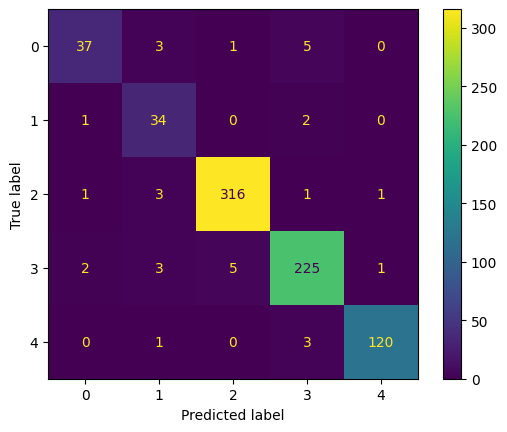

In [ ]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix(y_test,predicts))

disp.plot()
plt.show()

In [ ]:
from transformers import TextClassificationPipeline
#pipe = TextClassificationPipeline(model=classifier, tokenizer=tokenizer, return_all_scores=True)

In [ ]:
# Define optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Small learning rate for fine-tuning BERT
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=5)  # 2 labels for sentiment analysis

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7ee9b8f97520>